# Exploratory Data Analysis in pySpark

Data Exploration is about describing the data by means of statistical and visualization techniques. We explore data in order to understand the features and bring important features to our models.

In [11]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

from pyspark.sql.types import *
from pyspark.sql.functions import *

sc = SparkContext(master = "local" \
                , appName = "Exploratory Data Analysis") 

# Create a spark session 
spark = SparkSession(sc)
sqlContext = SQLContext(spark)

In [12]:
# Files we will be working with
path = "/home/danae/Documents/pySparkTraining/files/"

## Defining a schema
Creating a defined schema helps with data quality and import performance. 

In [13]:
# read the data 
sportSchema = StructType([
    StructField('sport_id', IntegerType(), False),
    StructField('sport', StringType(), False)
])

sportDF = sqlContext.read.schema(sportSchema) \
            .option('header', 'true').csv(path + 'deporte.csv')

In [14]:
resultSchema = StructType([
    StructField('result_id', IntegerType(), False),
    StructField('medal', StringType(), False),
    StructField('athlete_id', IntegerType(), False),
    StructField('game_id', IntegerType(), False),
    StructField('event_id', IntegerType(), False),    
])

resultDF = sqlContext.read.schema(resultSchema) \
            .option('header', 'true').csv(path + 'resultados.csv')

In [15]:
gameSchema = StructType([
    StructField('game_id', IntegerType(), False),
    StructField('name_game', StringType(), False),
    StructField('year', StringType(), False),
    StructField('season', StringType(), False),
    StructField('city', StringType(), False)
])

gameDF = sqlContext.read.schema(gameSchema) \
            .option('header', 'true').csv(path + 'juegos.csv')

In [16]:
athleteSchema = StructType([
    StructField('athlete_id', IntegerType(), False),
    StructField('name', StringType(), False),
    StructField('gender', IntegerType(), False),
    StructField('age', IntegerType(), False),
    StructField('height', IntegerType(), False),
    StructField('weigth', FloatType(), False),
    StructField('team_id', IntegerType(), False)
])

athleteDF = sqlContext.read.schema(athleteSchema) \
            .option('header', 'true').csv(path + 'deportista.csv')

In [17]:
sportDF.show(2)
gameDF.show(2)
resultDF.show(2)
athleteDF.show(2)

+--------+----------+
|sport_id|     sport|
+--------+----------+
|       1|Basketball|
|       2|      Judo|
+--------+----------+
only showing top 2 rows

+-------+-----------+----+------+------+
|game_id|  name_game|year|season|  city|
+-------+-----------+----+------+------+
|      1|1896 Verano|1896|Verano|Athina|
|      2|1900 Verano|1900|Verano| Paris|
+-------+-----------+----+------+------+
only showing top 2 rows

+---------+-----+----------+-------+--------+
|result_id|medal|athlete_id|game_id|event_id|
+---------+-----+----------+-------+--------+
|        1|   NA|         1|     39|       1|
|        2|   NA|         2|     49|       2|
+---------+-----+----------+-------+--------+
only showing top 2 rows

+----------+---------+------+---+------+------+-------+
|athlete_id|     name|gender|age|height|weigth|team_id|
+----------+---------+------+---+------+------+-------+
|         1|A Dijiang|     1| 24|   180|  80.0|    199|
|         2| A Lamusi|     1| 23|   170|  60.0|

In [18]:
medal_per_year = athleteDF.join(resultDF, athleteDF.athlete_id == resultDF.athlete_id, "left") \
                          .join(gameDF, gameDF.game_id == resultDF.game_id,  "left") \
                          .select("name","gender","age", "height", "weigth", "medal",
                                  "name_game", "year", "season", "city")
medal_per_year.show(5)

+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|                name|gender|age|height|weigth|medal|    name_game|year|  season|       city|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|           A Dijiang|     1| 24|   180|  80.0|   NA|  1992 Verano|1992|  Verano|  Barcelona|
|            A Lamusi|     1| 23|   170|  60.0|   NA|  2012 Verano|2012|  Verano|     London|
| Gunnar Nielsen Aaby|     1| 24|     0|   0.0|   NA|  1920 Verano|1920|  Verano|  Antwerpen|
|Edgar Lindenau Aabye|     1| 34|     0|   0.0| Gold|  1900 Verano|1900|  Verano|      Paris|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1994 Invierno|1994|Invierno|Lillehammer|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
only showing top 5 rows



In [19]:
medal_per_year.write.parquet(path + "olimpic_medals.parquet") 

## Inspecting data in PySpark DataFrame
Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc.,Inspect the data in the `medal_per_year` DataFrame that you have created in the previous exercise using basic DataFrame operators.

In [ ]:
# Count the number of rows 
print("There are {} rows in the medal_per_year DataFrame.".format(medal_per_year.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}"
      .format(len(medal_per_year.columns), medal_per_year.columns))

In [24]:
# Count the rows in voter_df
print("\nThere were %d rows in the medal_per_year DataFrame before filtering.\n" 
      % medal_per_year.count())

medal_per_year = medal_per_year.filter('height > 0 and weigth > 0')

print("\nThere are %d rows in the medal_per_year DataFrame.\n" 
      % medal_per_year.count())


There were 134720 rows in the medal_per_year DataFrame before filtering.


There are 102108 rows in the medal_per_year DataFrame.



In [25]:
medal_per_year.show(5)

+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|                name|gender|age|height|weigth|medal|    name_game|year|  season|       city|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|           A Dijiang|     1| 24|   180|  80.0|   NA|  1992 Verano|1992|  Verano|  Barcelona|
|            A Lamusi|     1| 23|   170|  60.0|   NA|  2012 Verano|2012|  Verano|     London|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1994 Invierno|1994|Invierno|Lillehammer|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1994 Invierno|1994|Invierno|Lillehammer|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1992 Invierno|1992|Invierno|Albertville|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
only showing top 5 rows



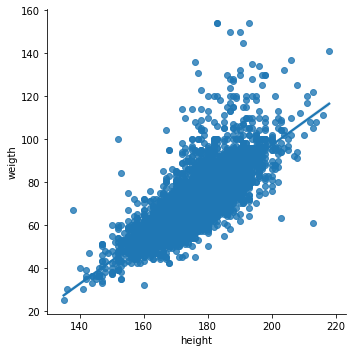

In [41]:
# Select a the relevant columns and sample
sample_df = medal_per_year.select('height', 'weigth').sample(False, 0.05, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

import seaborn as sns
import matplotlib.pyplot as plt
# Linear model plot of pandas_df
sns.lmplot(x='height', y='weigth', data=pandas_df)
plt.show()

## Using Corr()

The old adage **'Correlation does not imply Causation'** is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models.

In [40]:
print(medal_per_year.corr('height', 'weigth'))

0.7921186022403021


## Dropping a list of columns

Our data set is rich with a lot of features, but not all are valuable. We have many that are going to be hard to wrangle into anything useful. For now, let's remove any columns that aren't immediately useful by dropping them.

In [43]:
medal_per_year.columns

['name',
 'gender',
 'age',
 'height',
 'weigth',
 'medal',
 'name_game',
 'year',
 'season',
 'city']

In [44]:
# Show top 5 records
medal_per_year.show(5)

# List of columns to remove from dataset
cols_to_drop = ['year',
 'season',
 'city']

# Drop columns in list
medal_per_year2 = medal_per_year.drop(*cols_to_drop)
medal_per_year2.show(5)

+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|                name|gender|age|height|weigth|medal|    name_game|year|  season|       city|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
|           A Dijiang|     1| 24|   180|  80.0|   NA|  1992 Verano|1992|  Verano|  Barcelona|
|            A Lamusi|     1| 23|   170|  60.0|   NA|  2012 Verano|2012|  Verano|     London|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1994 Invierno|1994|Invierno|Lillehammer|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1994 Invierno|1994|Invierno|Lillehammer|
|Christine Jacoba ...|     2| 21|   185|  82.0|   NA|1992 Invierno|1992|Invierno|Albertville|
+--------------------+------+---+------+------+-----+-------------+----+--------+-----------+
only showing top 5 rows

+--------------------+------+---+------+------+-----+-------------+
|                name|gender|age|height|weigth|medal|    name

In [ ]:
# Drop NA 
medal_per_year = medal_per_year.where(~medal_per_year['medal'].like('NA'))
# Print count of remaining records
print(medal_per_year.count())

In [47]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
medal_per_year.select(['medal']).distinct().show()

+------+
| medal|
+------+
|Silver|
|  Gold|
|Bronze|
+------+



## Filtering numeric fields conditionally

Again, understanding the context of your data is extremely important. Let's make sure we exclude any outliers. 

In [50]:
#from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_height = medal_per_year.agg({'height': 'mean'}).collect()[0][0]
stddev_height = medal_per_year.agg({'height': 'stddev'}).collect()[0][0]

mean_weigth = medal_per_year.agg({'weigth': 'mean'}).collect()[0][0]
stddev_weigth = medal_per_year.agg({'weigth': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound_h = mean_height - (3 * stddev_height)
hi_bound_h = mean_height + (3 * stddev_height)

low_bound_w = mean_weigth - (3 * stddev_weigth)
hi_bound_w = mean_weigth + (3 * stddev_weigth)

# Filter the data to fit between the lower and upper bounds
medal_per_year = medal_per_year.where((col('height') < hi_bound_h)  &
                                      (col('height') > low_bound_h) & 
                                      (col('weigth') < hi_bound_w)  &
                                      (col('weigth') > low_bound_w))

In [51]:
print(medal_per_year.count())

14458


## Custom Percentage Scaling

In [53]:
# Define max and min values and collect them
max_height = medal_per_year.agg({'height': 'max'}).collect()[0][0]
min_height = medal_per_year.agg({'height': 'min'}).collect()[0][0]
print(max_height)
print(min_height)

210
146


In [54]:
# Create a new column based off the scaled data
medal_per_year = medal_per_year.withColumn("percentagescaledheight", 
                  round((col("height") - min_height) / (max_height - min_height)) * 100)

# Calc max and min for new column
print(medal_per_year.agg({'percentagescaledheight': 'max'}).show())
print(medal_per_year.agg({'percentagescaledheight': 'min'}).show())

+---------------------------+
|max(percentagescaledheight)|
+---------------------------+
|                      100.0|
+---------------------------+

None
+---------------------------+
|min(percentagescaledheight)|
+---------------------------+
|                        0.0|
+---------------------------+

None


In [56]:
# if you want to do the same on several columns, it is better to write a function 
def min_max_scaler(df, cols_to_scale):
    
  # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
  for col in cols_to_scale:
    # Define min and max values and collect them
    max_days = df.agg({col: 'max'}).collect()[0][0]
    min_days = df.agg({col: 'min'}).collect()[0][0]
    new_column_name = 'scaled_' + col
    # Create a new column based off the scaled data
    df = df.withColumn(new_column_name, 
                      (df[col] - min_days) / (max_days - min_days))
    return df  

In [64]:
medal_per_year = min_max_scaler(medal_per_year, cols_to_scale=['weigth'])
# Show that our data is now between 0 and 1
medal_per_year.select('height', 'weigth').show(5)

+------+------+
|height|weigth|
+------+------+
|   184|  85.0|
|   175|  64.0|
|   175|  64.0|
|   175|  64.0|
|   175|  64.0|
+------+------+
only showing top 5 rows



In [66]:
medal_per_year.select('scaled_height', 'scaled_weigth').show(5)

+-------------+-------------------+
|scaled_height|      scaled_weigth|
+-------------+-------------------+
|      0.59375|  0.611764705882353|
|     0.453125|0.36470588235294116|
|     0.453125|0.36470588235294116|
|     0.453125|0.36470588235294116|
|     0.453125|0.36470588235294116|
+-------------+-------------------+
only showing top 5 rows



Creating scalable solutions that can be reused will free up many hours of you and your teams time. 

In [65]:
medal_per_year.printSchema()

root
 |-- name: string (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weigth: float (nullable = true)
 |-- medal: string (nullable = true)
 |-- name_game: string (nullable = true)
 |-- year: string (nullable = true)
 |-- season: string (nullable = true)
 |-- city: string (nullable = true)
 |-- percentagescaledheight: double (nullable = true)
 |-- scaled_height: double (nullable = true)
 |-- scaled_weigth: double (nullable = true)



In [10]:
sc.stop() # close the spark session